In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns
import os
import shutil
import re
from zipfile import ZipFile
from os import listdir
from pathlib import Path
import glob

In [2]:
dir_data = Path('../../DATA/P7') 
dir_fig  = Path('../../FIGURE/P7')
work_dir=os.getcwd()
CHECK_FOLDER  = Path('../../DATA/P7') 

csv_files = glob.glob(os.path.join(dir_data, '*.csv'))

if len(csv_files) > 0:
    print ("Fichier existe") 
else:
    for dirname, _, filenames in os.walk(dir_data):
        for filename in filenames:
            file_in=os.path.join(dirname, filename)
            print(file_in)
            with ZipFile(file_in, 'r') as zip:
                zip.extractall(dir_data)
    
    csv_files = glob.glob(os.path.join(dir_data, '*.csv'))
#


Fichier existe


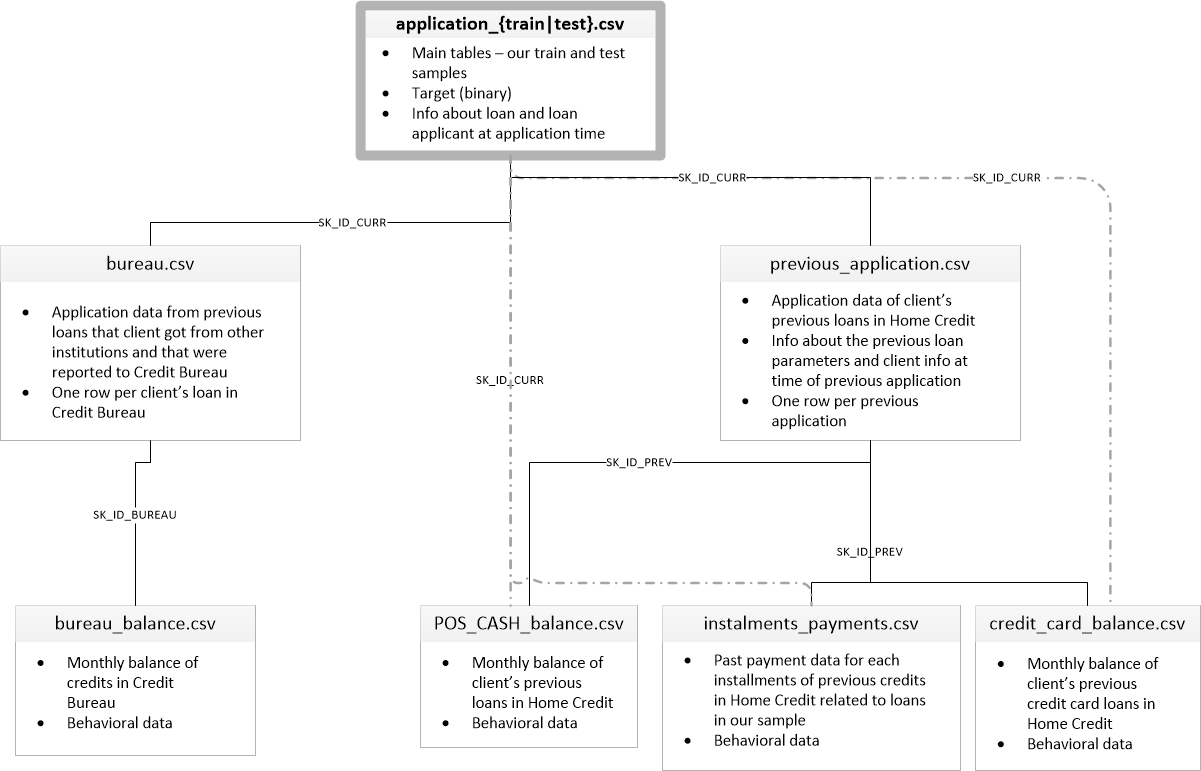

In [3]:
from IPython.display import Image
Image(filename = (Path(str(dir_fig) + "/home_credit.png")), width=1500, height=1500)

In [4]:
# Reduce Memory Usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage. Source : https://www.kaggle.com/ekrembayar/homecredit-default-risk-step-by-step-1st-notebook    
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [5]:
data = {}
for file  in  csv_files:
    keys = file.split('../../DATA/P7/')[1].split('.csv')[0]
    data[keys] = reduce_mem_usage(pd.read_csv(file, encoding = "ISO-8859-1"))
    display(f"{keys}: {data[keys].shape}")

Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%


'installments_payments: (13605401, 8)'

Memory usage of dataframe is 1542.78 MB
Memory usage after optimization is: 531.03 MB
Decreased by 65.6%


'train_1: (1465325, 138)'

Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%


'POS_CASH_balance: (10001358, 8)'

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


'application_test: (48744, 121)'

Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 14.8%


'HomeCredit_columns_description: (219, 5)'

Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%


'credit_card_balance: (3840312, 23)'

Memory usage of dataframe is 1918.16 MB
Memory usage after optimization is: 1099.63 MB
Decreased by 42.7%


'prev_cur: (4334775, 58)'

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


'application_train: (307511, 122)'

Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%


'bureau_balance: (27299925, 3)'

Memory usage of dataframe is 0.74 MB
Memory usage after optimization is: 0.28 MB
Decreased by 62.5%


'sample_submission: (48744, 2)'

Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%


'bureau: (1716428, 17)'

Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


'previous_application: (1670214, 37)'

In [6]:
data.keys()

dict_keys(['installments_payments', 'train_1', 'POS_CASH_balance', 'application_test', 'HomeCredit_columns_description', 'credit_card_balance', 'prev_cur', 'application_train', 'bureau_balance', 'sample_submission', 'bureau', 'previous_application'])

In [7]:
for knx in data:
    if knx=='HomeCredit_columns_description':
        data[knx]=data[knx].drop(['Unnamed: 0'],axis=1)

Les differents fichiers ont des tailles differentes.

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    df_missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return df_missing_data

valeur_manquante = pd.DataFrame()
for knx in data:
    print(knx)
    miss_val=missing_data(data[knx])
    valeur_manquante = pd.concat([valeur_manquante,
                            miss_val['Percent'].to_frame(name=knx)],
                            axis=1)
    

installments_payments
train_1
POS_CASH_balance
application_test
HomeCredit_columns_description
credit_card_balance
prev_cur
application_train
bureau_balance
sample_submission
bureau
previous_application


In [9]:
valeur_manquante_pct = valeur_manquante.T.stack().reset_index()
valeur_manquante_pct.columns = ['Tableaux de données', 'column', '%données']
valeur_manquante_pct.sample(3)

,Tableaux de données,column,%données
534,previous_application,NAME_CLIENT_TYPE,0.0
472,application_train,LIVE_REGION_NOT_WORK_REGION,0.0
484,bureau_balance,STATUS,0.0


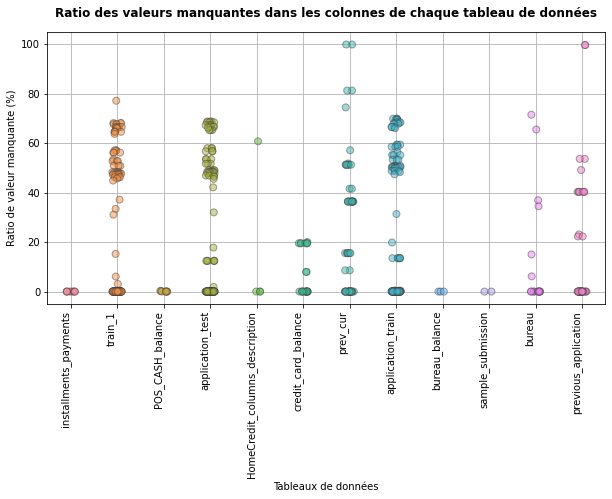

In [10]:
sns.stripplot(x='Tableaux de données', y='%données', data=valeur_manquante_pct,
              linewidth=1, alpha = 0.5, size=7)
plt.gcf().set_size_inches(10,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Tableaux de données')
ax.set_title('Ratio des valeurs manquantes dans les colonnes de chaque tableau de données',
             fontweight='bold', pad=15)
plt.grid()


## Feature Engineering and data visualisation

#### Train

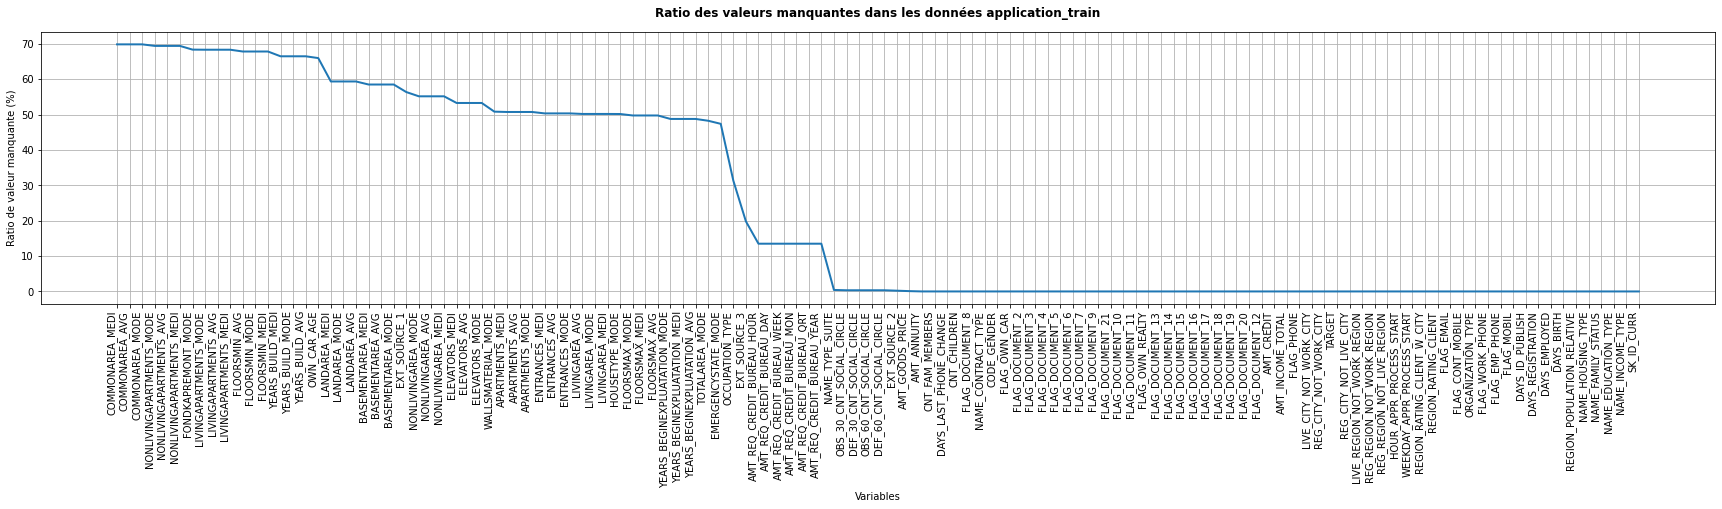

In [11]:
table='application_train'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données application_train',
             fontweight='bold', pad=15)
plt.grid()


In [12]:
# Remove vars that has too many missing variable
data2use={}
cols_remove = data[table].columns[data[table].isnull().sum()/data[table].isnull().count()*100 >= 50]
data2use[table]= data[table].drop(cols_remove,axis=1)

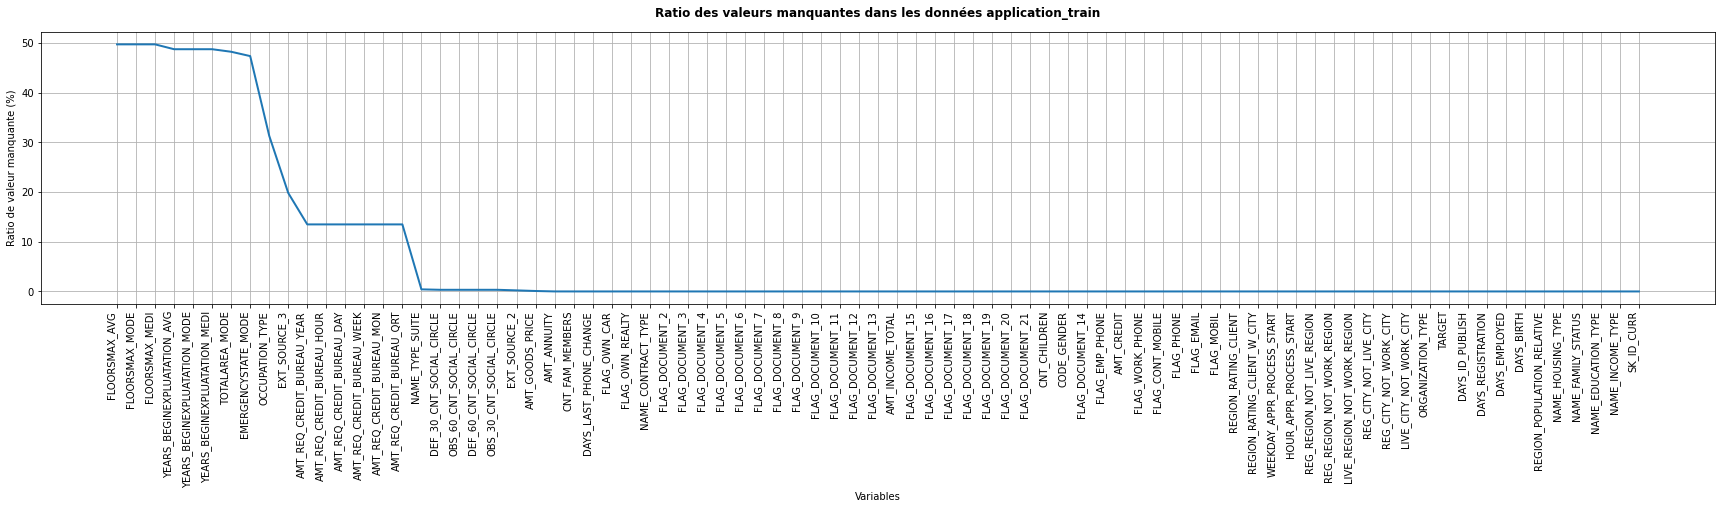

In [13]:
df=missing_data(data2use[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données application_train',
             fontweight='bold', pad=15)
plt.grid()

In [14]:
# label encoding every categorical features 
from sklearn.preprocessing import LabelEncoder
for col in list(data2use[table].columns):
    if data2use[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data2use[table][col]=label_encoders.fit_transform(data2use[table][col])

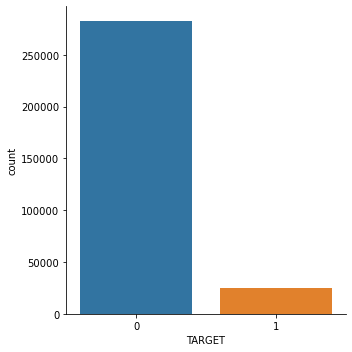

In [15]:

ax=sns.catplot(data=data2use[table], x='TARGET',kind="count")

In [16]:
da=data2use[table]['TARGET'].value_counts()
print('% of class 0 ---> ',da[1]*100/da[0])

% of class 0 --->  8.781828601345662


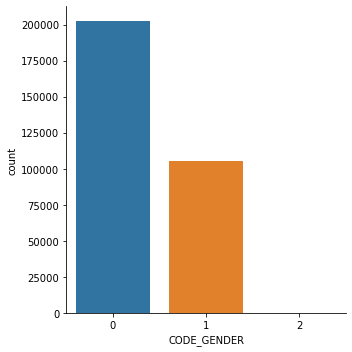

In [17]:
ax=sns.catplot(data=data2use[table], x='CODE_GENDER',kind="count")

In [18]:
da=data2use[table]['CODE_GENDER'].value_counts()

print('% M regarding F ---> ',da[1]*100/da[0])

% M regarding F --->  51.894313601517425


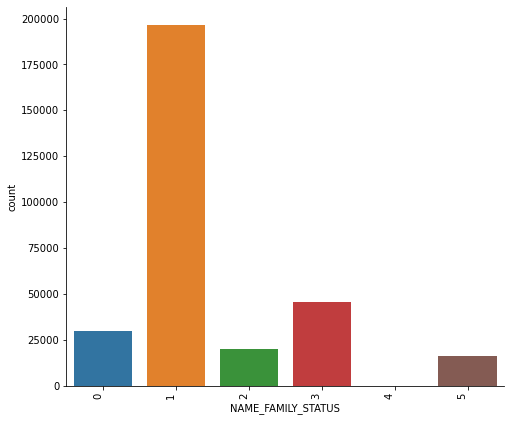

In [19]:
ax=sns.catplot(data=data2use[table], x='NAME_FAMILY_STATUS',kind="count",height=6, aspect=1.2)
for axes in ax.axes.flat:
                axes.set_xticklabels(axes.get_xticklabels(),rotation = 90,horizontalalignment = 'right')


In [20]:
da=data2use[table]['NAME_FAMILY_STATUS'].value_counts()

print('% Non married regarding married ---> ',(da[1]+da[2]+da[3]+da[4]+da[5])*100/da.max())

% Non married regarding married --->  141.39040482202492


### credit_card_balance

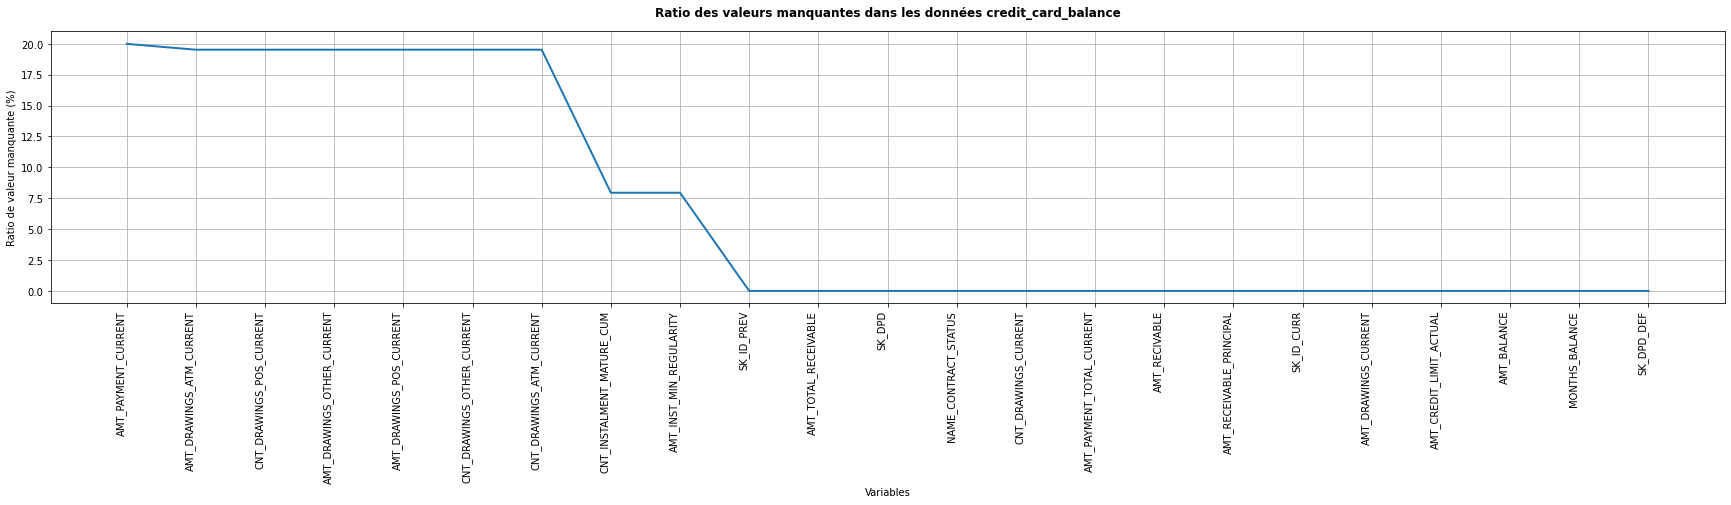

In [21]:
table='credit_card_balance'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données credit_card_balance',
             fontweight='bold', pad=15)
plt.grid()


In [22]:
# label encoding every categorical features 
data_inter=copy.deepcopy(data[table])

for col in list(data[table].columns):
    if data[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data_inter[col]=label_encoders.fit_transform(data[table][col])
        print(col)

NAME_CONTRACT_STATUS


We keep all variables. There is no need to drop any

In [23]:
aggr={'MONTHS_BALANCE':np.mean,
         'AMT_BALANCE':np.mean,
         'AMT_CREDIT_LIMIT_ACTUAL':np.mean,
         'AMT_DRAWINGS_ATM_CURRENT':np.mean,
         'AMT_DRAWINGS_CURRENT':np.mean,
         'AMT_DRAWINGS_OTHER_CURRENT':np.mean,
         'AMT_DRAWINGS_POS_CURRENT':np.mean,
         'AMT_INST_MIN_REGULARITY':np.mean,
         'AMT_PAYMENT_CURRENT':np.mean,
         'AMT_PAYMENT_TOTAL_CURRENT':np.mean,
         'AMT_RECEIVABLE_PRINCIPAL':np.mean,
         'AMT_RECIVABLE':np.mean,
         'AMT_TOTAL_RECEIVABLE':np.mean,
         'CNT_DRAWINGS_ATM_CURRENT':np.mean,
         'CNT_DRAWINGS_CURRENT':np.mean,
         'CNT_DRAWINGS_OTHER_CURRENT':np.mean,
         'CNT_DRAWINGS_POS_CURRENT':np.mean,
         'CNT_INSTALMENT_MATURE_CUM':np.mean,
         'NAME_CONTRACT_STATUS':np.mean,
         'SK_DPD':np.mean,
         'SK_DPD_DEF':np.mean}

data2use[table] = data_inter.groupby(['SK_ID_CURR'],as_index=False).agg(aggr)

### previous_application

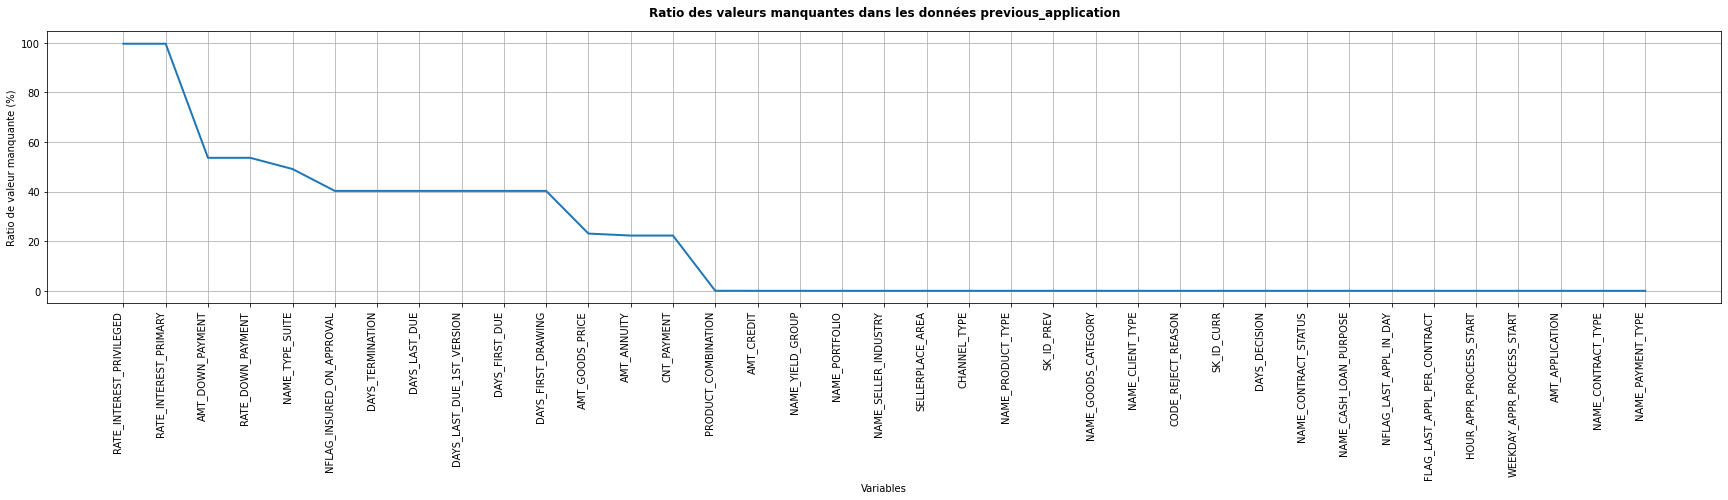

In [24]:
table='previous_application'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données previous_application',
             fontweight='bold', pad=15)
plt.grid()

In [25]:
# Remove vars that has too many missing variable
cols_remove = data[table].columns[data[table].isnull().sum()/data[table].isnull().count()*100 >= 50]
data2use[table]= data[table].drop(cols_remove,axis=1)

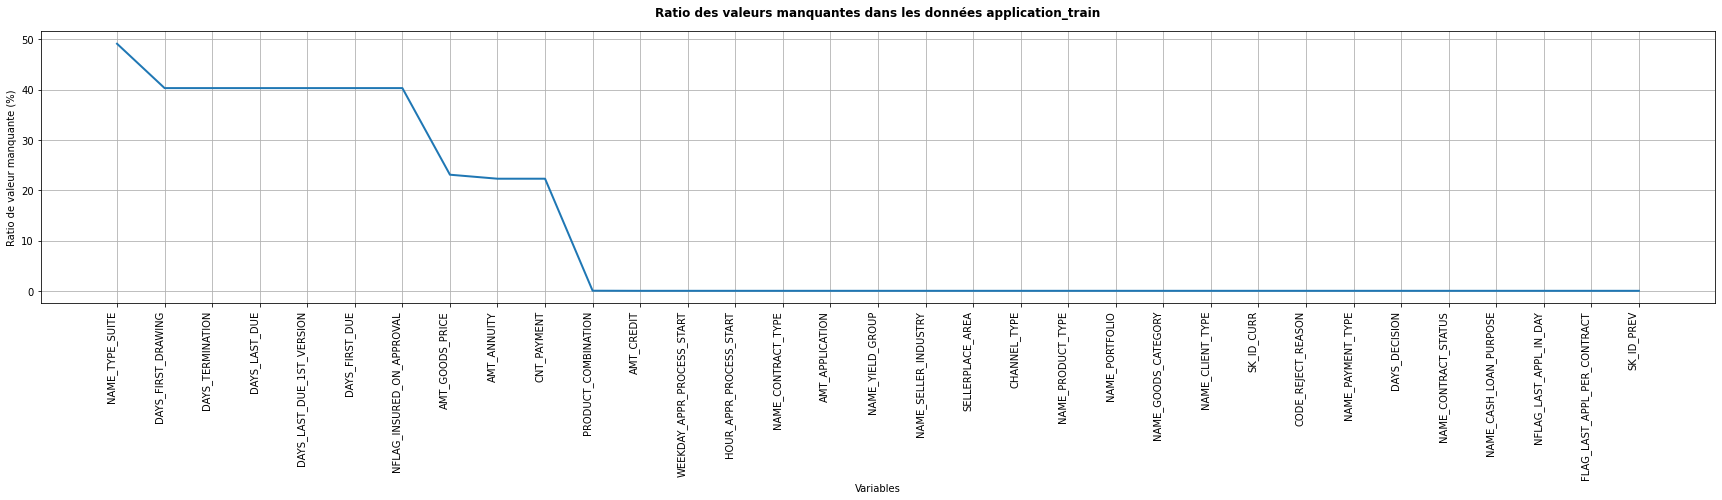

In [26]:
df=missing_data(data2use[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données application_train',
             fontweight='bold', pad=15)
plt.grid()

In [27]:
data_inter=copy.deepcopy(data[table])

for col in list(data[table].columns):
    if data[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data_inter[col]=label_encoders.fit_transform(data[table][col])
        print(col)

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [28]:
aggr={
'NAME_CONTRACT_TYPE':np.mean, 'AMT_ANNUITY':np.mean,
'AMT_APPLICATION':np.mean, 'AMT_CREDIT':np.mean, 'AMT_GOODS_PRICE':np.mean,
'WEEKDAY_APPR_PROCESS_START':np.mean, 'HOUR_APPR_PROCESS_START':np.mean,
'FLAG_LAST_APPL_PER_CONTRACT':np.mean, 'NFLAG_LAST_APPL_IN_DAY':np.mean,
'NAME_CASH_LOAN_PURPOSE':np.mean, 'NAME_CONTRACT_STATUS':np.mean, 'DAYS_DECISION':np.mean,
'NAME_PAYMENT_TYPE':np.mean, 'CODE_REJECT_REASON':np.mean, 'NAME_TYPE_SUITE':np.mean,
'NAME_CLIENT_TYPE':np.mean, 'NAME_GOODS_CATEGORY':np.mean, 'NAME_PORTFOLIO':np.mean,
'NAME_PRODUCT_TYPE':np.mean, 'CHANNEL_TYPE':np.mean, 'SELLERPLACE_AREA':np.mean,
'NAME_SELLER_INDUSTRY':np.mean, 'CNT_PAYMENT':np.mean, 'NAME_YIELD_GROUP':np.mean,
'PRODUCT_COMBINATION':np.mean, 'DAYS_FIRST_DRAWING':np.mean, 'DAYS_FIRST_DUE':np.mean,
'DAYS_LAST_DUE_1ST_VERSION':np.mean, 'DAYS_LAST_DUE':np.mean, 'DAYS_TERMINATION':np.mean,
'NFLAG_INSURED_ON_APPROVAL':np.mean,  
}

data2use[table] = data_inter.groupby(['SK_ID_CURR'],as_index=False).agg(aggr)

## installments_payments

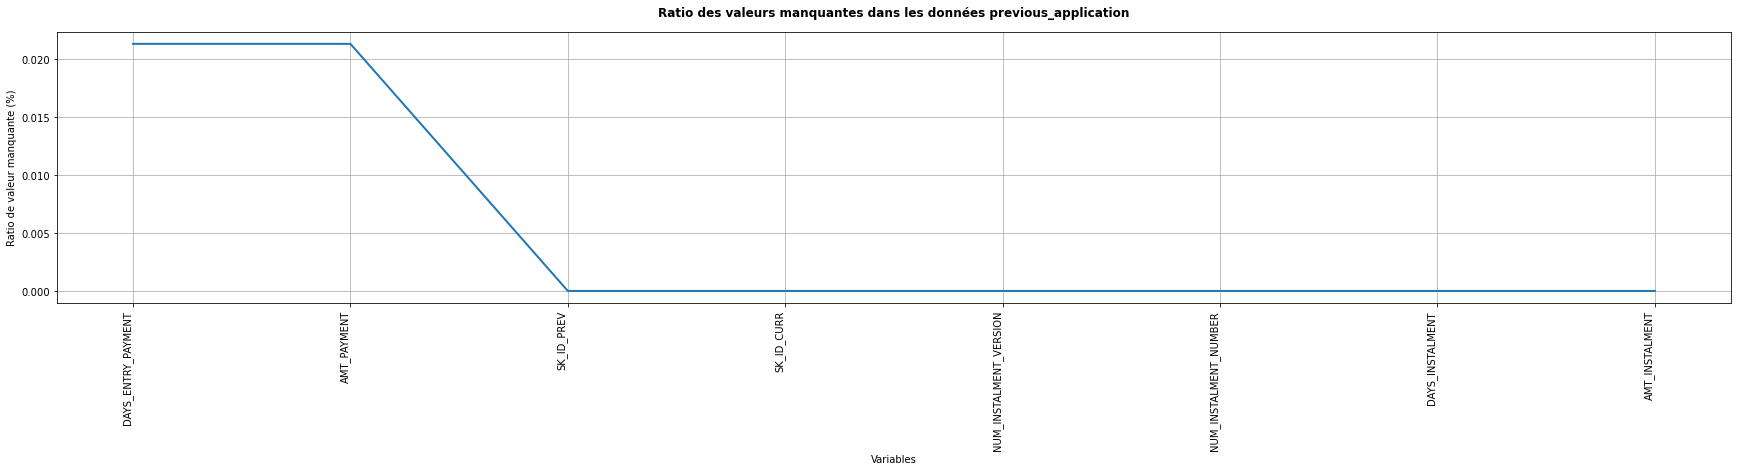

In [29]:
table='installments_payments'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données previous_application',
             fontweight='bold', pad=15)
plt.grid()

In [30]:
data_inter=copy.deepcopy(data[table])

for col in list(data[table].columns):
    if data[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data_inter[col]=label_encoders.fit_transform(data[table][col])
        print(col)

In [31]:
aggr={
'NUM_INSTALMENT_VERSION':np.mean,
       'NUM_INSTALMENT_NUMBER':np.mean, 'DAYS_INSTALMENT':np.mean, 'DAYS_ENTRY_PAYMENT':np.mean,
       'AMT_INSTALMENT':np.mean, 'AMT_PAYMENT':np.mean,  
}

data2use[table] = data_inter.groupby(['SK_ID_CURR'],as_index=False).agg(aggr)

### bureau + bureau_balance

#### bureau

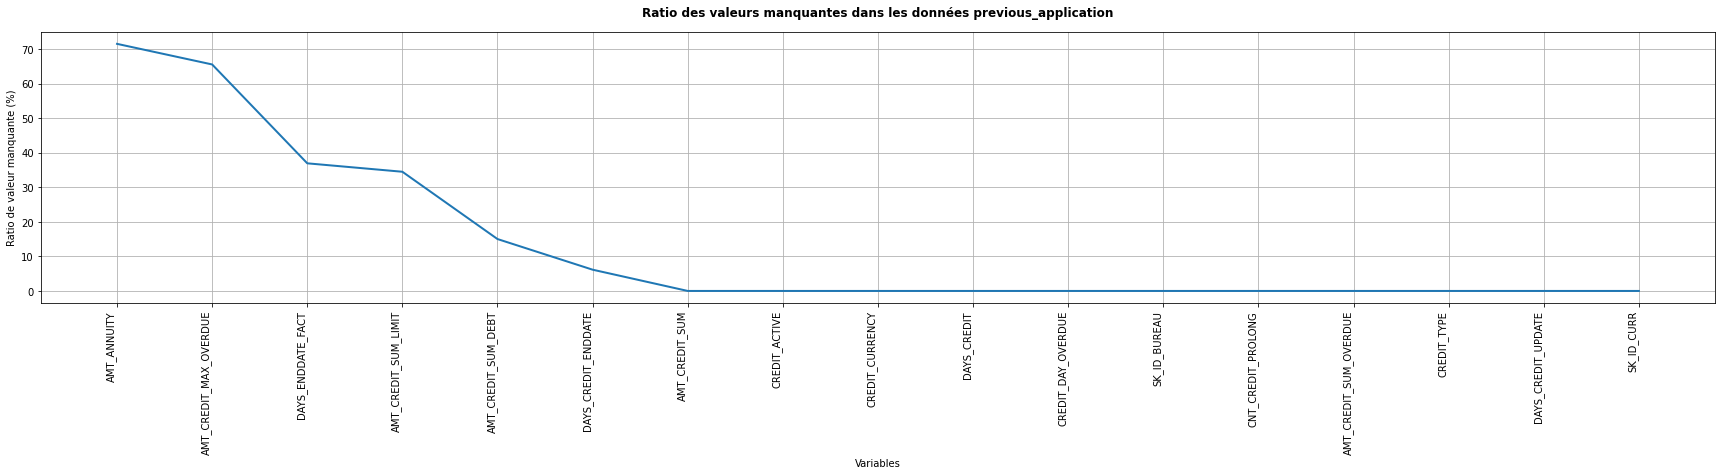

In [32]:

table='bureau'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données previous_application',
             fontweight='bold', pad=15)
plt.grid()

In [33]:
# Remove vars that has too many missing variable
cols_remove = data[table].columns[data[table].isnull().sum()/data[table].isnull().count()*100 >= 50]
data2use[table]= data[table].drop(cols_remove,axis=1)

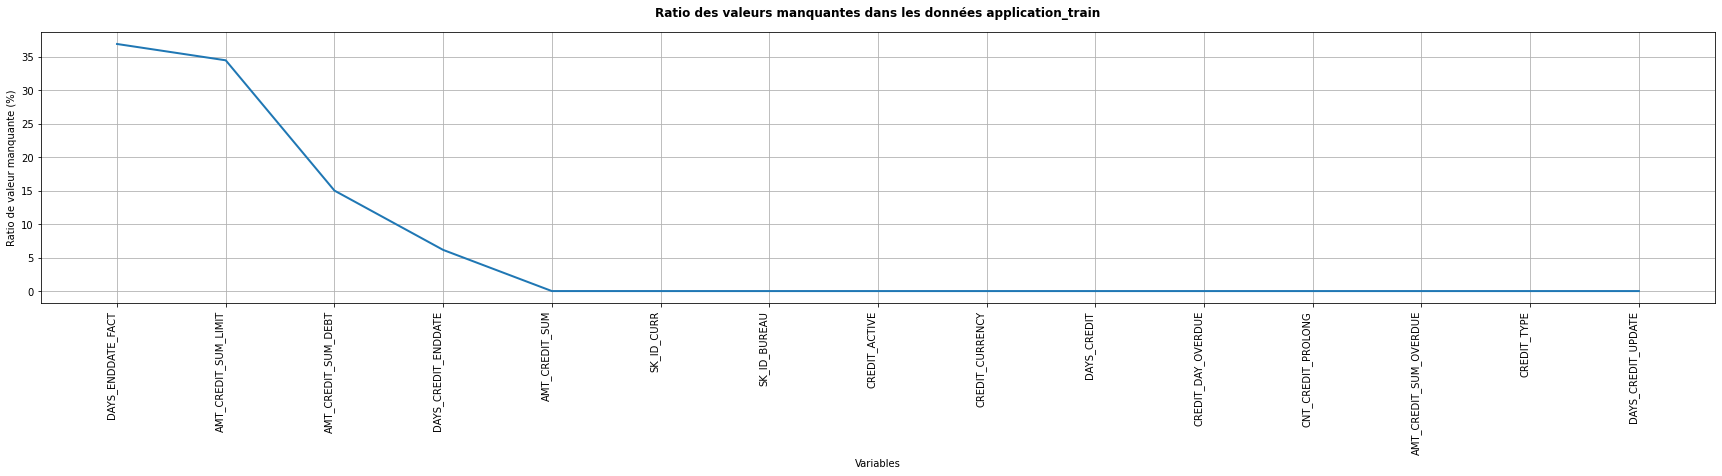

In [34]:
df=missing_data(data2use[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données application_train',
             fontweight='bold', pad=15)
plt.grid()

In [35]:
data_inter_bur=copy.deepcopy(data[table])

for col in list(data[table].columns):
    if data[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data_inter_bur[col]=label_encoders.fit_transform(data[table][col])
        print(col)

CREDIT_ACTIVE
CREDIT_CURRENCY
CREDIT_TYPE


### bureau_balance

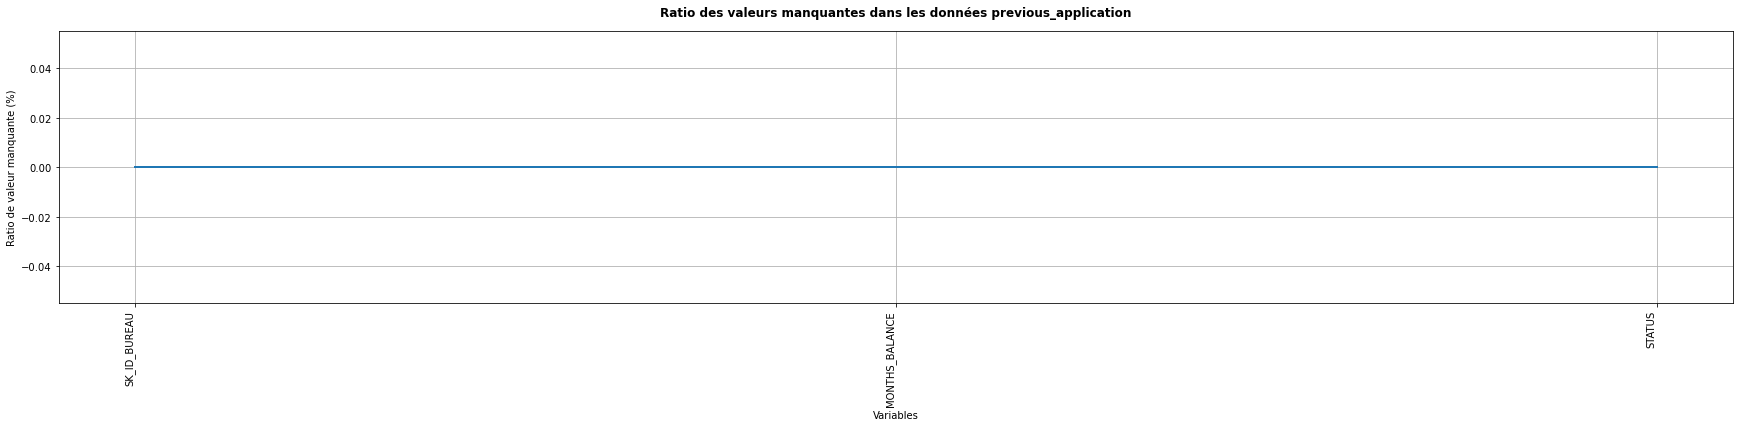

In [36]:
table='bureau_balance'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données previous_application',
             fontweight='bold', pad=15)
plt.grid()

In [37]:
data_inter_bur_bal=copy.deepcopy(data[table])

for col in list(data[table].columns):
    if data[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data_inter_bur_bal[col]=label_encoders.fit_transform(data[table][col])
        print(col)

STATUS


In [38]:
bur_merged = data_inter_bur.merge(data_inter_bur_bal,on='SK_ID_BUREAU',how='left')

In [39]:
bur_merged.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [40]:
aggr_bur={
'CREDIT_ACTIVE':np.mean, 'CREDIT_CURRENCY':np.mean,
'DAYS_CREDIT':np.mean, 'CREDIT_DAY_OVERDUE':np.mean, 'DAYS_CREDIT_ENDDATE':np.mean,
'DAYS_ENDDATE_FACT':np.mean, 'AMT_CREDIT_MAX_OVERDUE':np.mean, 'CNT_CREDIT_PROLONG':np.mean,
'AMT_CREDIT_SUM':np.mean, 'AMT_CREDIT_SUM_DEBT':np.mean, 'AMT_CREDIT_SUM_LIMIT':np.mean,
'AMT_CREDIT_SUM_OVERDUE':np.mean, 'CREDIT_TYPE':np.mean, 'DAYS_CREDIT_UPDATE':np.mean,
'AMT_ANNUITY':np.mean, 'MONTHS_BALANCE':np.mean, 'STATUS':np.mean,  
}
data2use['bureau'] = bur_merged.groupby(['SK_ID_CURR'],as_index=False).agg(aggr_bur)

### POS_CASH_balance

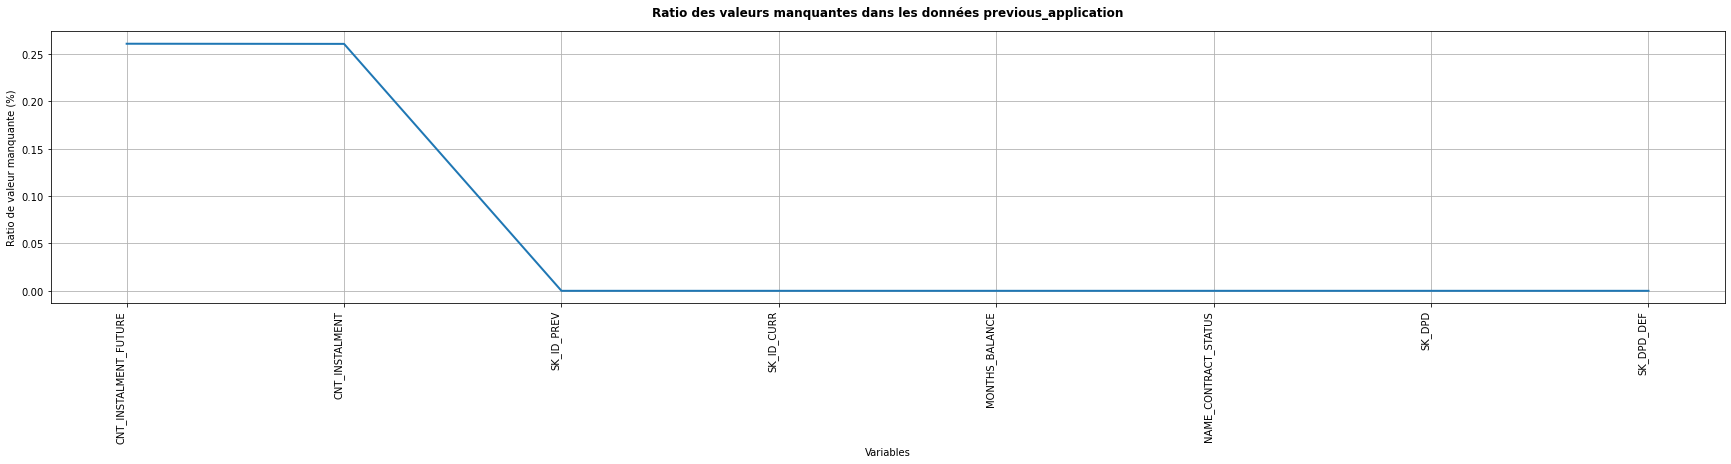

In [41]:

table='POS_CASH_balance'
df=missing_data(data[table])
sns.lineplot(x=df.index, y='Percent', data=df,
              linewidth=2)
plt.gcf().set_size_inches(30,5)
plt.xticks(rotation=90, ha='right')
ax = plt.gca()
ax.set_ylabel('Ratio de valeur manquante (%)')
ax.set_xlabel('Variables')
ax.set_title('Ratio des valeurs manquantes dans les données previous_application',
             fontweight='bold', pad=15)
plt.grid()

In [42]:
data_inter=copy.deepcopy(data[table])

for col in list(data[table].columns):
    if data[table][col].dtype == 'object':
        label_encoders = LabelEncoder()
        data_inter[col]=label_encoders.fit_transform(data[table][col])
        print(col)

NAME_CONTRACT_STATUS


In [43]:
data_inter.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [44]:
aggr={
'MONTHS_BALANCE':np.mean, 'CNT_INSTALMENT':np.mean,
       'CNT_INSTALMENT_FUTURE':np.mean, 'NAME_CONTRACT_STATUS':np.mean, 'SK_DPD':np.mean,
       'SK_DPD_DEF':np.mean,  
}

data2use[table] = data_inter.groupby(['SK_ID_CURR'],as_index=False).agg(aggr)

## Merge data

Trouver les relations (Identité des clés) entre les tableaux de données

In [45]:
ID_keys={}
for knx in data:
    for inx in data[knx].columns:
        if '_' in inx:
            id_keys = inx.split('_')[1].split('_')[0]
            if id_keys=='ID':
                ID_keys[knx] = inx
                display(f"{knx}: {'----------'}, {data[knx].shape}, {inx}")

'installments_payments: ----------, (13605401, 8), SK_ID_PREV'

'installments_payments: ----------, (13605401, 8), SK_ID_CURR'

'train_1: ----------, (1465325, 138), SK_ID_CURR'

'train_1: ----------, (1465325, 138), DAYS_ID_PUBLISH'

'train_1: ----------, (1465325, 138), SK_ID_BUREAU'

'POS_CASH_balance: ----------, (10001358, 8), SK_ID_PREV'

'POS_CASH_balance: ----------, (10001358, 8), SK_ID_CURR'

'application_test: ----------, (48744, 121), SK_ID_CURR'

'application_test: ----------, (48744, 121), DAYS_ID_PUBLISH'

'credit_card_balance: ----------, (3840312, 23), SK_ID_PREV'

'credit_card_balance: ----------, (3840312, 23), SK_ID_CURR'

'prev_cur: ----------, (4334775, 58), SK_ID_PREV'

'prev_cur: ----------, (4334775, 58), SK_ID_CURR'

'application_train: ----------, (307511, 122), SK_ID_CURR'

'application_train: ----------, (307511, 122), DAYS_ID_PUBLISH'

'bureau_balance: ----------, (27299925, 3), SK_ID_BUREAU'

'sample_submission: ----------, (48744, 2), SK_ID_CURR'

'bureau: ----------, (1716428, 17), SK_ID_CURR'

'bureau: ----------, (1716428, 17), SK_ID_BUREAU'

'previous_application: ----------, (1670214, 37), SK_ID_PREV'

'previous_application: ----------, (1670214, 37), SK_ID_CURR'

In [46]:
# Merge Credit tables into one
data_merged = data2use['application_train'].merge(data2use['credit_card_balance'],on='SK_ID_CURR',how='left')
data_merged = data_merged.merge(data2use['previous_application'],on='SK_ID_CURR',how='left')
data_merged = data_merged.merge(data2use['installments_payments'],on='SK_ID_CURR',how='left')
data_merged = data_merged.merge(data2use['bureau'],on='SK_ID_CURR',how='left')
data_merged = data_merged.merge(data2use['POS_CASH_balance'],on='SK_ID_CURR',how='left')


In [47]:
data_merged.shape

(307511, 162)